In [1]:
import pandas
import numpy
from scipy.stats import binom
import matplotlib.pyplot as plt


url = ('https://github.com/dhesse/IN-STK5000-Autumn21'
       '/raw/main/compas-scores-two-years.csv.gz')
data = pandas.read_csv(url) # load the data
data.groupby('age_cat')['two_year_recid'].mean() # point estimate

age_cat
25 - 45            0.459723
Greater than 45    0.315990
Less than 25       0.565075
Name: two_year_recid, dtype: float64

<AxesSubplot:ylabel='Frequency'>

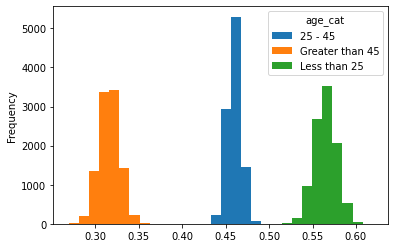

In [14]:
bss = pandas.DataFrame([
    data.sample(data.shape[0], replace=True).
        groupby('age_cat')['two_year_recid'].mean()
    for _ in range(10000)])
bss.plot.hist(bins=30)

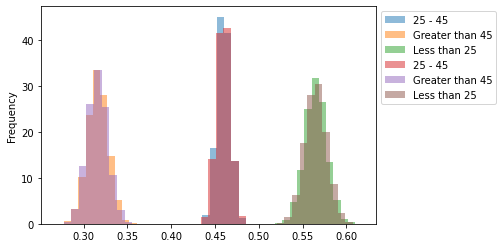

In [16]:
params = pandas.DataFrame({
    'N': data.groupby('age_cat').size(),
    'k': data.groupby('age_cat')['two_year_recid'].sum(),
})
binomial = params.apply(
    lambda x: binom.rvs(x['N'], # make a model and draw samples
                        x['k']/x['N'],
                        size=5000)/x['N'], axis=1, result_type='expand').T
ax = binomial.plot.hist(bins=40, density=True, alpha=0.5)
bss.plot.hist(bins=40, ax=ax, density=True, alpha=0.5)
plt.legend(bbox_to_anchor=(1,1))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
Xtr, Xte, ytr, yte = train_test_split(data[['age_cat']], data['two_year_recid'], test_size=0.2)

In [21]:
ytr.groupby(Xtr['age_cat']).mean()

age_cat
25 - 45            0.463689
Greater than 45    0.317422
Less than 25       0.565822
Name: two_year_recid, dtype: float64

In [22]:
pred = Xte['age_cat'] == 'Less than 25'

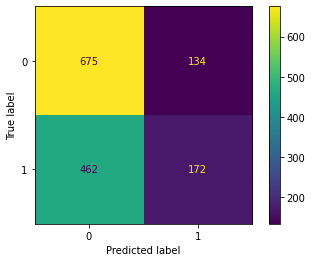

In [35]:
ConfusionMatrixDisplay(confusion_matrix(yte, pred)).plot()

In [37]:
confusion_matrix(yte, pred)

array([[675, 134],
       [462, 172]])

In [48]:
X = pandas.get_dummies(data[['age_cat', 'priors_count']])
y = data['two_year_recid']

In [49]:
import numpy

In [72]:
cms = []
for _ in range(1000):
    idx = numpy.random.choice(len(y), len(y), True)
    Xtr, Xte, ytr, yte = train_test_split(X.iloc[idx], y.iloc[idx], test_size=0.2)
    model = DecisionTreeClassifier(max_depth=2).fit(Xtr, ytr)
    cms.append(confusion_matrix(yte, model.predict(Xte), normalize='true'))

In [69]:
from itertools import product

In [70]:
labels = [['tnr', 'fnr'], ['fpr', 'tpr']]

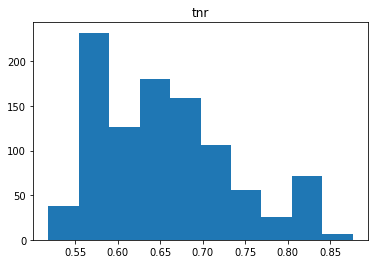

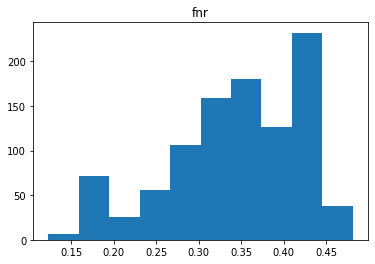

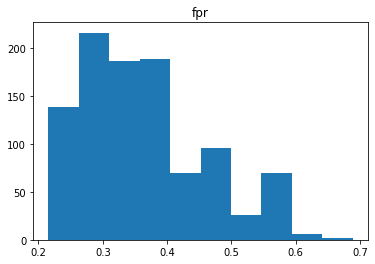

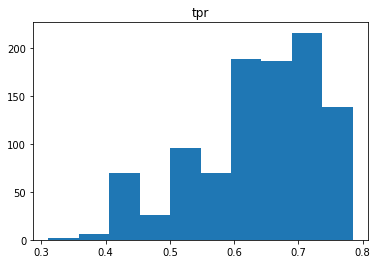

<Figure size 432x288 with 0 Axes>

In [73]:
for i, j in product([0,1], repeat=2):
    plt.hist([c[i,j] for c in cms])
    plt.title(labels[i][j])
    plt.figure()